# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import regex
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

Before proceeding to analyze the data. Let's take a look to which kind of data each column is standing for.

1. **Rank**: The ranking position of the song within a specific day.
2. **Title**: The name of the song.
3. **Artists**: The artists credited in the song.
4. **Date**: The date in which this ranking is taking place.
5. **Danceability**: A measure of how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and overall regularity. The value typically ranges from 0 to 1.
6. **Energy**: A measure of the intensity and activity of the song. Energetic tracks feel fast, loud, and noisy, while calm tracks feel slower or softer. Values range from 0 to 1.
7. **Loudness**: The overall volume level of the song in decibels (dB), suppose that averaged across the entire track.
8. **Speechiness**: A measure of the presence of spoken words in a track. Higher values indicate that a track is more speech-like (e.g., podcasts, talk shows).
9. **Acousticness**: A confidence measure of whether the track is acoustic. Higher values indicate a stronger presence of acoustic elements. Value between 0 and 1.
10. **Instrumentalness**: Predicts whether a track contains no vocals. A higher value indicates a more instrumental track.Value betweeen 0 and 1.
11. **Valence**: A measure of the musical positiveness of the song. Tracks with higher valence sound more positive (happy, cheerful), while tracks with lower valence sound more negative (sad, angry). Values between 0 and 1.
12. **# of Artist**: The number of artists credited for the song.
13. **Artist (Ind.)**: The individual artist's name, often used when there are multiple artists credited.
14. **# of Nationality**: The number of nationalities represented by the artists on the track.
15. **Nationality**: The nationality or nationalities of the artist(s).
16. **Continent**: The continent(s) where the artist(s) originates from.
17. **Points (Total)**: The total points scored by the song in a ranking or scoring system.
18. **Points (Ind for each Artist/Nat)**: The points assigned for each individual artist or nationality in relation to the song.
19. **id**: A unique identifier for the song in the dataset.
20. **Song URL**: A link to the song’s page on Spotify.

In [3]:
import os 
path = os.getcwd()
df1 = pd.read_csv("data_prep/Spotify_Dataset_V3.csv", delimiter=";")
print(df1.shape)
df1.head()

(651936, 20)


,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [ ]:
genre_df = pd.read_csv("data_prep/output_with_genres.csv")

genre_df = genre_df[['Title', 'Genre']]
genre_df.drop_duplicates(inplace=True)
genre_df.shape

(7457, 2)

In [10]:
df_merged = pd.merge(df1, genre_df, on='Title', how='inner')
df_merged['Genre'] = df_merged['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_merged['Genre'] = df_merged['Genre'].apply(lambda x: regex.sub(r' ', r'-', str(x[0].strip())) if isinstance(x, list) and x else str(''))
df_merged.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Genre
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,corrido
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,corrido
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,...,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,reggaeton
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,reggaeton
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,reggaeton


In [11]:
df_merged = df_merged[df_merged['Genre'].notna() & (df_merged['Genre'] != '')]

In [ ]:
df_parent = pd.read_csv("data_prep/parent_genre.csv")

df_parent.head()

,Genre,Parent Genre
0,corrido,latin
1,reggaeton,latin
2,k-pop-girl-group,pop
3,musica-chihuahuense,latin
4,pop,pop


In [13]:
df_transformed = pd.merge(df_merged, df_parent, on='Genre', how='inner')
df_transformed.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Genre,Parent Genre
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,corrido,latin
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,corrido,latin
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,...,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,reggaeton,latin
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,reggaeton,latin
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,reggaeton,latin


In [14]:
df_transformed.shape

(635489, 22)

In [15]:
missing_values = df_transformed.isnull().sum()
print(missing_values[missing_values > 0])
# Remove rows with missing values
df_transformed = df_transformed.dropna()
print(df_transformed.isnull().any())

Parent Genre    293
dtype: int64
Rank                                False
Title                               False
Artists                             False
Date                                False
Danceability                        False
Energy                              False
Loudness                            False
Speechiness                         False
Acousticness                        False
Instrumentalness                    False
Valence                             False
# of Artist                         False
Artist (Ind.)                       False
# of Nationality                    False
Nationality                         False
Continent                           False
Points (Total)                      False
Points (Ind for each Artist/Nat)    False
id                                  False
Song URL                            False
Genre                               False
Parent Genre                        False
dtype: bool


In [ ]:
# Mean of the 'Rank' column for each 'id' for combination
mean_rank = df_transformed.groupby('id', as_index=False)['Rank'].mean()

# New column will be called 'Mean Rank'
mean_rank.rename(columns={'Rank': 'Mean Rank'}, inplace=True)

# Merge the mean 'Rank' values back into the original dataframe
df_transformed = pd.merge(df_transformed, mean_rank, on='id', how='inner')

In [17]:
print(df_transformed['Date'].nunique())
print(df_transformed['Parent Genre'].nunique())
print(df_transformed['id'].nunique())
print(df_transformed['Artists'].nunique())

2336
14
8684
2794


## Train Test Split

In [18]:
unique_songs = df_transformed[['id', 'Parent Genre']].drop_duplicates(subset='id')

train_ids, test_ids = train_test_split(
    unique_songs['id'], 
    test_size=0.20, 
    random_state=42, 
    stratify=unique_songs['Parent Genre']
)
df = df_transformed[df_transformed['id'].isin(train_ids)]
df_test = df_transformed[df_transformed['id'].isin(test_ids)]

df.shape, df_test.shape

((511850, 23), (123346, 23))

## Train preprocess

In [19]:
print("----------------------- HEAD ------------------")
print(df.head())

----------------------- HEAD ------------------
   Rank            Title                     Artists        Date  \
0     1  Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
1     1  Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
2     2   WHERE SHE GOES                   Bad Bunny  29/05/2023   
3     3  La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   
4     3  La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   

   Danceability  Energy  Loudness  Speechiness  Acousticness  \
0         0.668   0.758   -5176.0        0.033         0.483   
1         0.668   0.758   -5176.0        0.033         0.483   
2         0.652   0.800   -4019.0        0.061         0.143   
3         0.812   0.479   -5678.0        0.333         0.213   
4         0.812   0.479   -5678.0        0.333         0.213   

   Instrumentalness  ...  # of Nationality  Nationality      Continent  \
0             0.000  ...     Nationality 1       Mexico  Latin-America   
1         

In [20]:
print("----------------------- DESCRIPTION ------------------")
print(df.describe())

----------------------- DESCRIPTION ------------------
                Rank   Danceability         Energy       Loudness  \
count  511850.000000  511850.000000  511850.000000  511850.000000   
mean      100.372848       0.696667       0.654437   -5282.348458   
std        57.245133       0.133053       0.153156    2779.566984   
min         1.000000       0.073000       0.005000  -34475.000000   
25%        51.000000       0.617000       0.554000   -6769.000000   
50%        99.000000       0.716000       0.673000   -5211.000000   
75%       150.000000       0.793000       0.771000   -3874.000000   
max       200.000000       0.985000       0.996000    1509.000000   

         Speechiness   Acousticness  Instrumentalness        Valence  \
count  511850.000000  511850.000000     511850.000000  511850.000000   
mean        0.110179       0.226360          0.006992       0.521067   
std         0.098020       0.229505          0.051258       0.225716   
min         0.022000       0.000000

In [21]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")

Rank: 200 unique values
Title: 5856 unique values
Artists: 2431 unique values
Date: 2336 unique values
Danceability: 719 unique values
Energy: 831 unique values
Loudness: 4512 unique values
Speechiness: 500 unique values
Acousticness: 923 unique values
Instrumentalness: 259 unique values
Valence: 931 unique values
# of Artist: 9 unique values
Artist (Ind.): 1886 unique values
# of Nationality: 9 unique values
Nationality: 66 unique values
Continent: 7 unique values
Points (Total): 200 unique values
Points (Ind for each Artist/Nat): 453 unique values
id: 6947 unique values
Song URL: 6947 unique values
Genre: 386 unique values
Parent Genre: 14 unique values
Mean Rank: 4143 unique values


In [22]:
print("\nMissing Values:\n")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(df['Parent Genre'].isnull().any())


Missing Values:

Series([], dtype: int64)
False


In [23]:
print("\nDuplicate Rows:\n")
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Duplicate Rows:

Total duplicate rows: 0


In [24]:
def clean_text(text):
    return re.sub(r'\$', 's', str(text))

In [25]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = ["Title", "Artists", "Date", "# of Artist", "Artist (Ind.)", "# of Nationality", "Nationality", "Continent"]

for feature in categorical_features:
    df[feature] = df[feature].apply(clean_text)

C:\Users\user\AppData\Local\Temp\ipykernel_22504\4275962607.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].apply(clean_text)


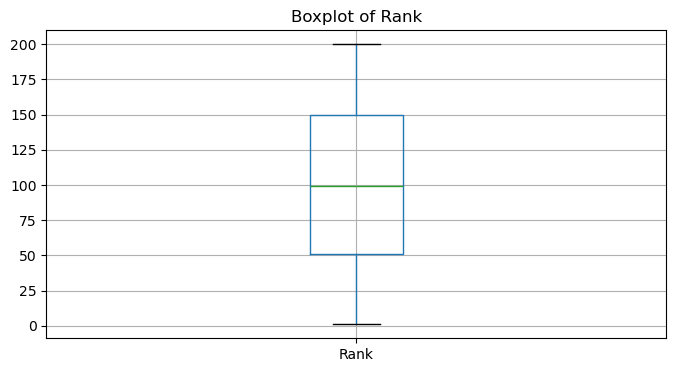

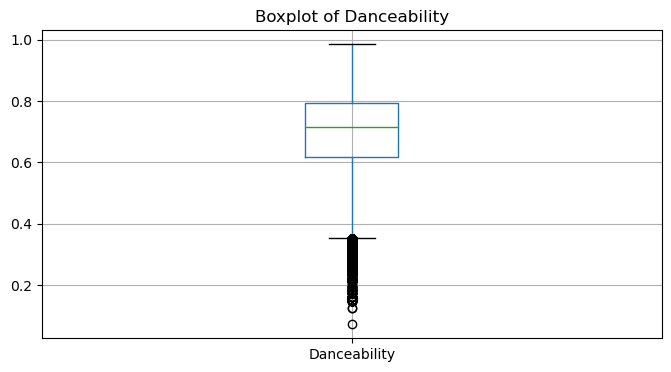

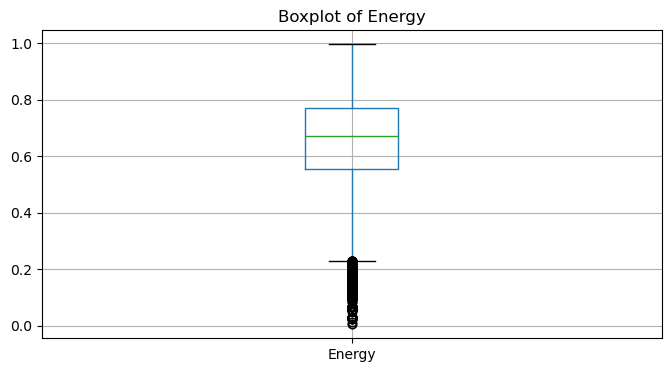

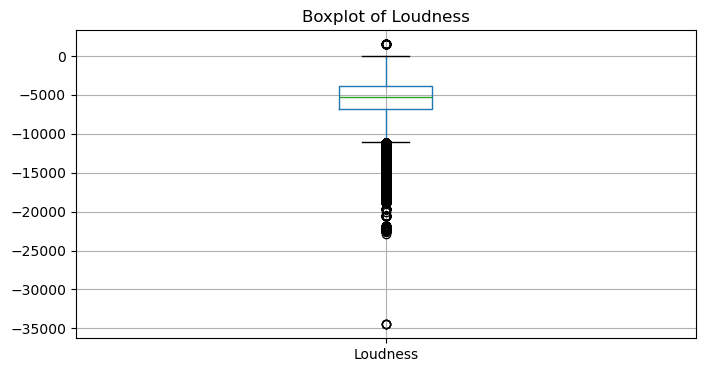

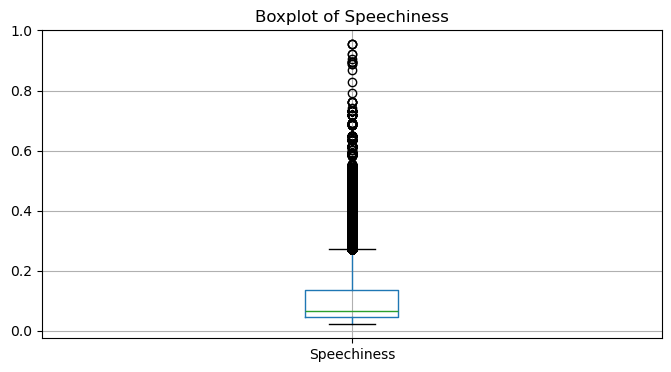

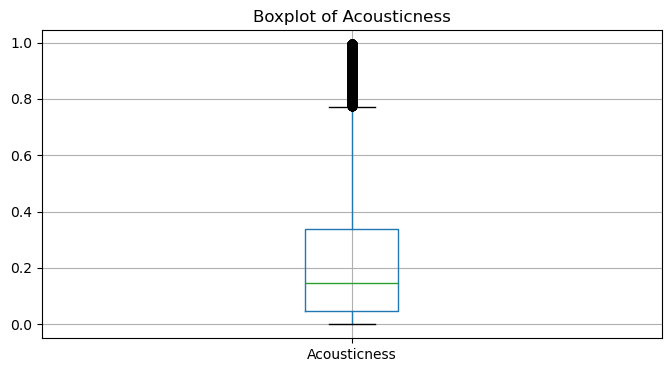

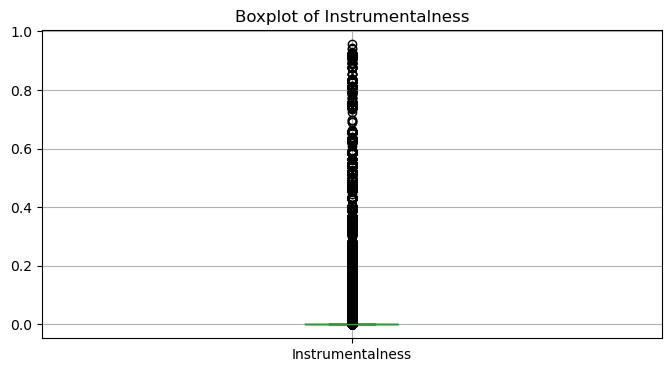

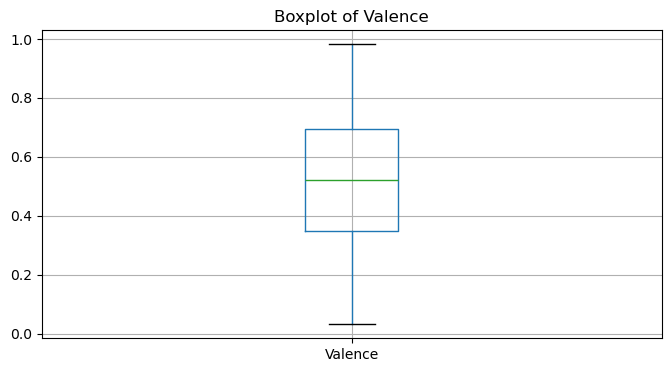

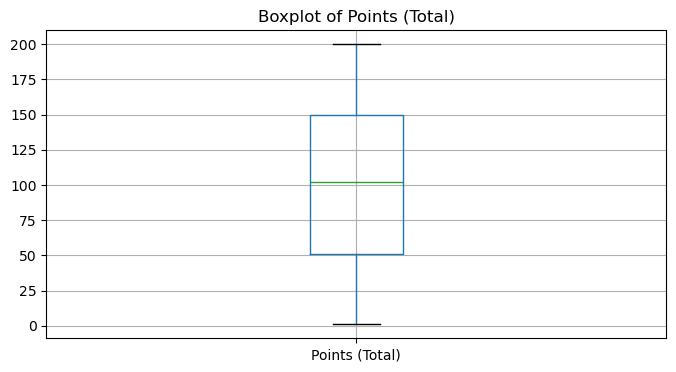

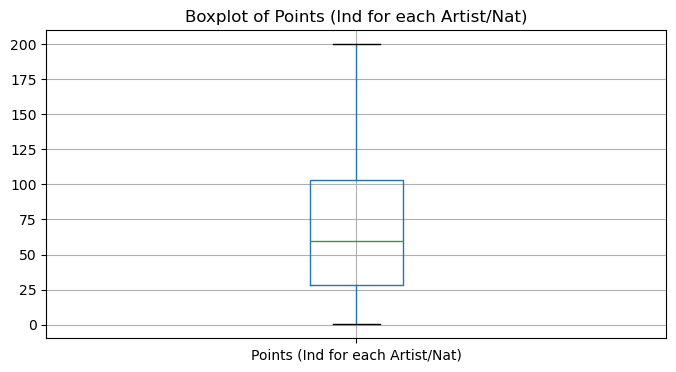

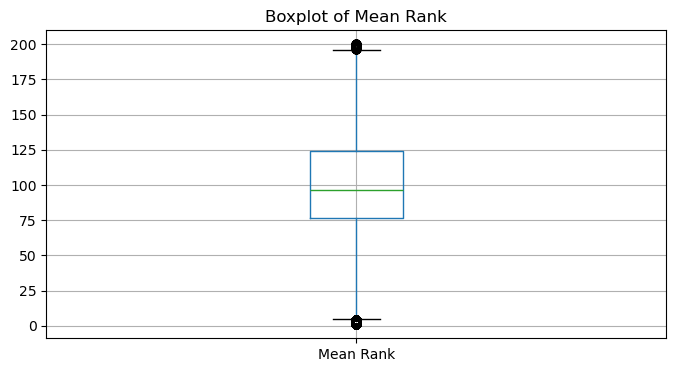

In [26]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    df.boxplot(column=feature)
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [27]:
def remove_outliers_iqr(df: pd.DataFrame, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [28]:
df_rm_outliers = remove_outliers_iqr(df, numerical_features)
print(df_rm_outliers.shape)

(377184, 23)


C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37326 (\N{CJK UNIFIED IDEOGRAPH-91CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\IPython\core\pylabtools.py:170: Us

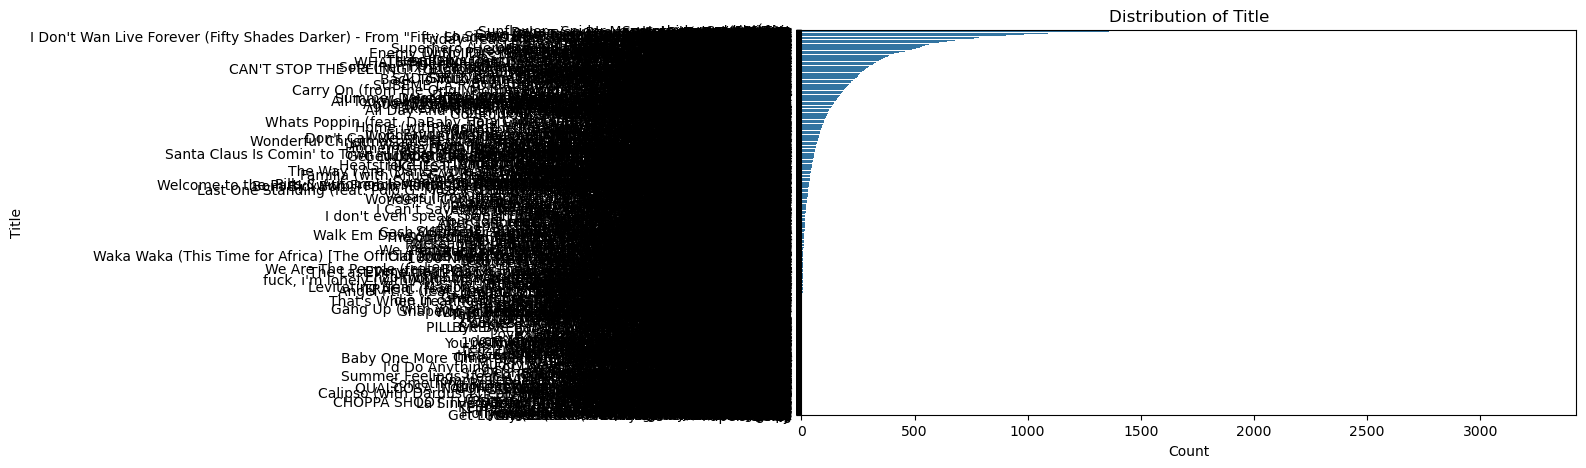

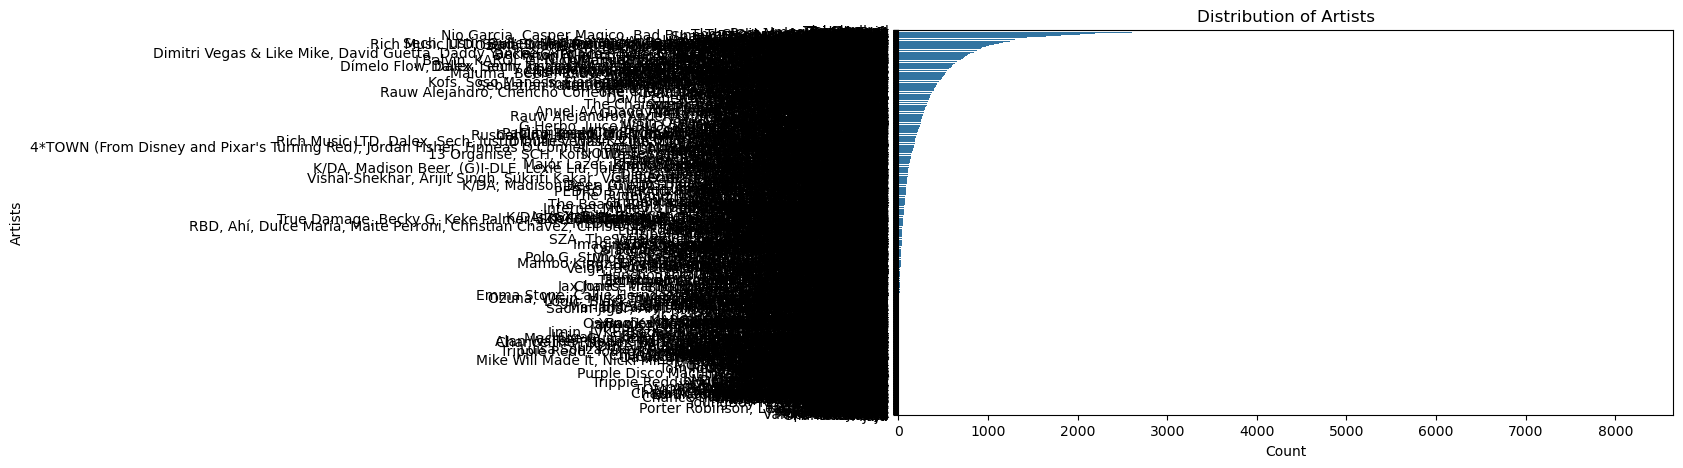

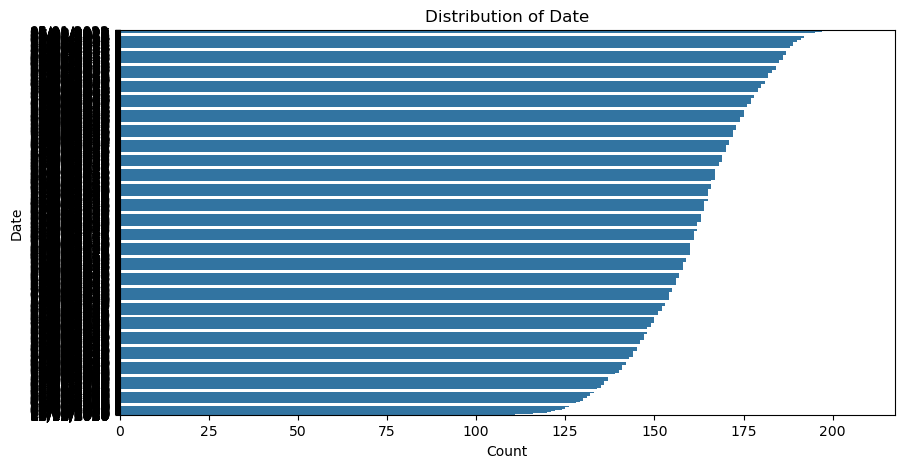

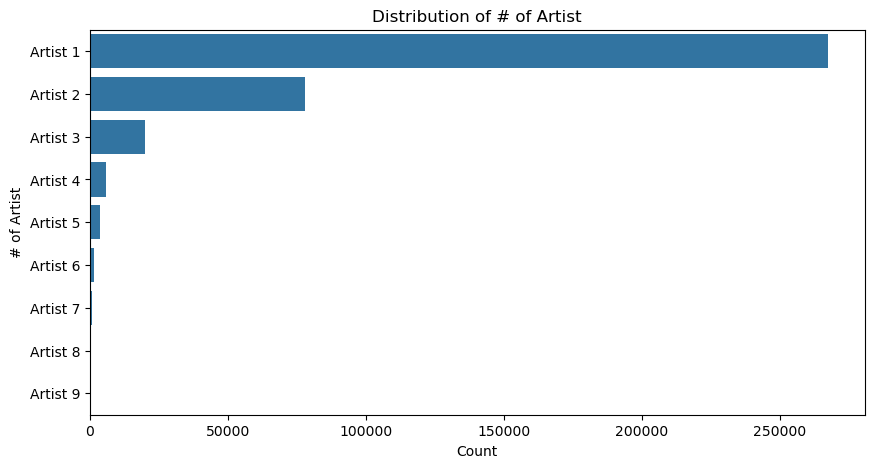

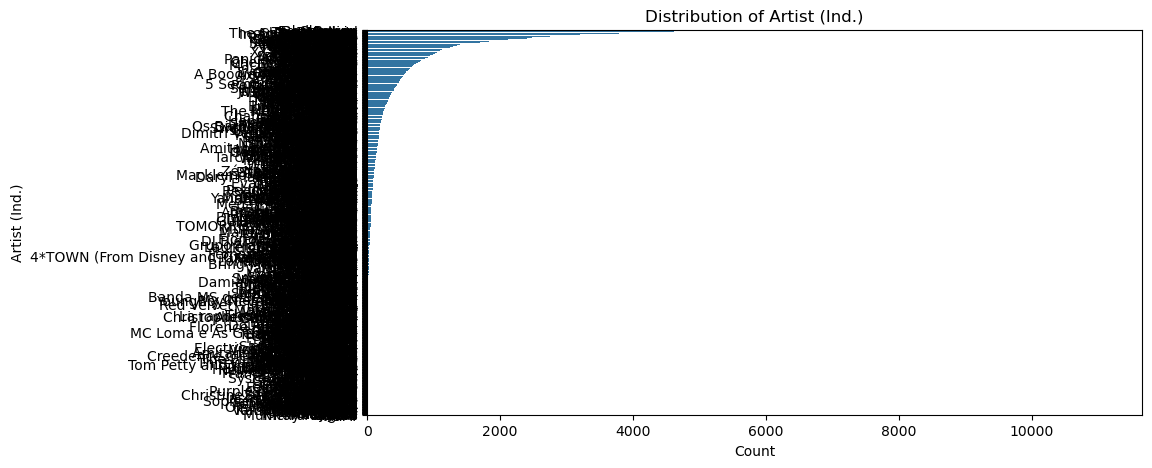

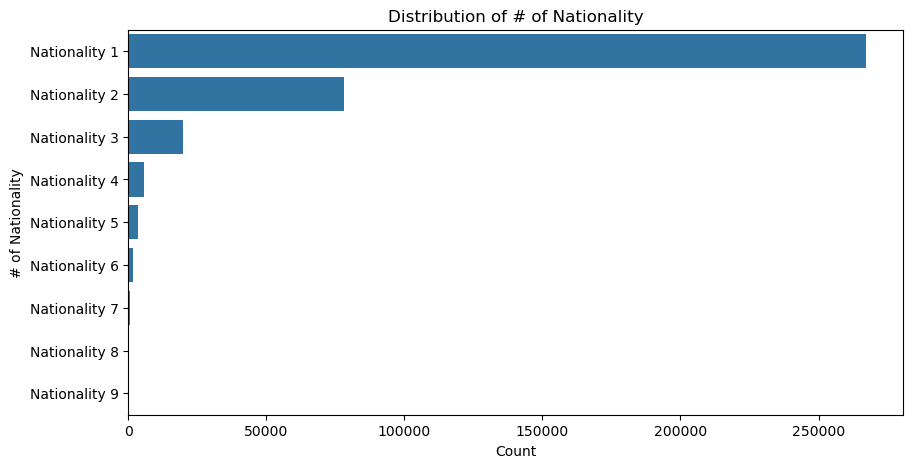

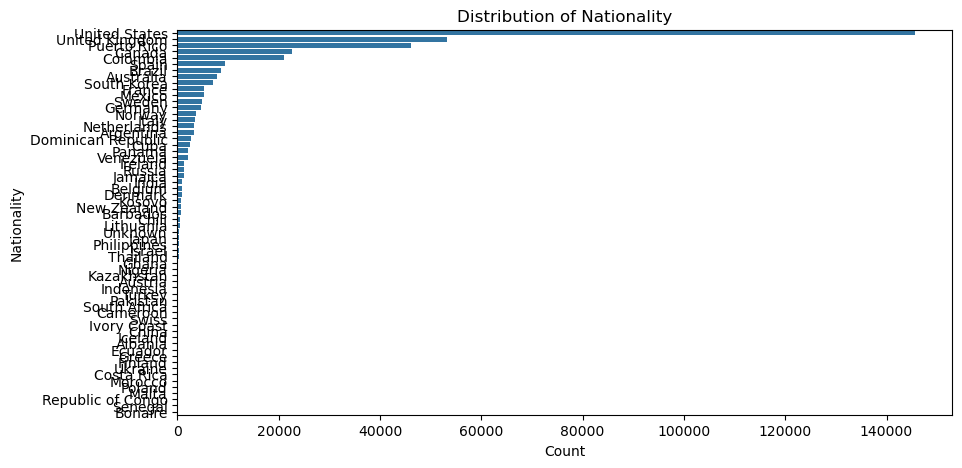

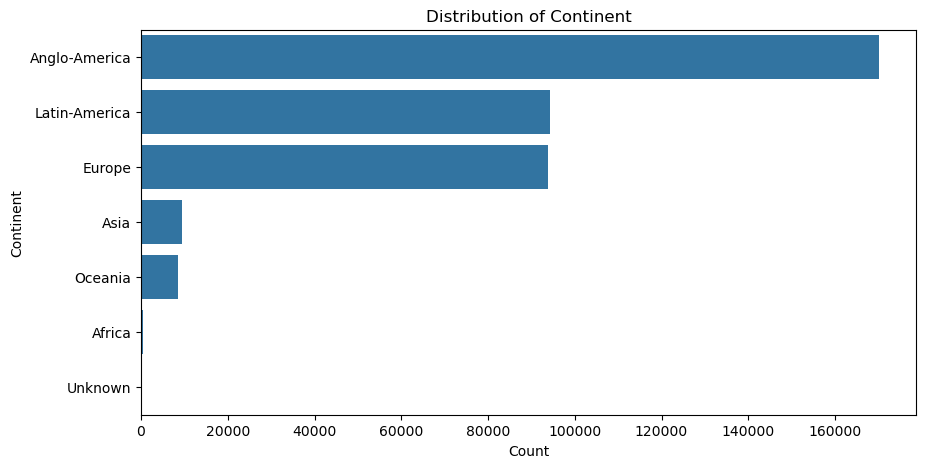

In [29]:
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_rm_outliers, y=feature, order=df_rm_outliers[feature].value_counts().index)
    plt.title(f"Distribution of {feature}")
    plt.xlabel("Count")
    plt.ylabel(feature)
    plt.show()

In [30]:
top_n = 15
top_nationalities = df_rm_outliers['Nationality'].value_counts().nlargest(top_n).index
df_rm_outliers['Nationality'] = df_rm_outliers['Nationality'].apply(lambda x: x if x in top_nationalities else 'Other')
print(df_rm_outliers['Nationality'].value_counts())

Nationality
United States     145717
United Kingdom     53206
Puerto Rico        46159
Other              28898
Canada             22585
Colombia           21041
Spain               9324
Brazil              8559
Australia           7810
South Korea         6964
France              5294
Mexico              5172
Sweden              4759
Germany             4646
Norway              3579
Italy               3471
Name: count, dtype: int64


In [ ]:
df_rm_outliers['Date'] = pd.to_datetime(df_rm_outliers['Date'], dayfirst=True, errors='coerce')
df_rm_outliers['Year'] = df_rm_outliers['Date'].dt.year
df_rm_outliers['Month'] = df_rm_outliers['Date'].dt.month

df_rm_outliers['Month_Quarter'] = df_rm_outliers['Date'].dt.day.apply(lambda x: 1 if x <= 15 else 2)
df_rm_outliers['Year'] = df_rm_outliers['Year'].astype('category')
df_rm_outliers['Month'] = df_rm_outliers['Month'].astype('category')
df_rm_outliers['Month_Quarter'] = df_rm_outliers['Month_Quarter'].astype('category')

In [32]:
threshold = 0.5
# Remove the Instrumentalness column since it is distributed too close to zero giving problems to normalize it.
df_rm_outliers['Is_Instrumental'] = df_rm_outliers['Instrumentalness'].apply(lambda x: 1 if x > threshold else 0)
df_rm_outliers['Is_Instrumental'] = df_rm_outliers['Is_Instrumental'].astype('category')
categorical_features.append('Is_Instrumental')



In [33]:
print(df_rm_outliers[['Date', 'Year', 'Month', 'Month_Quarter']].head())

         Date  Year Month Month_Quarter
5  2023-05-29  2023     5             2
12 2023-05-29  2023     5             2
13 2023-05-29  2023     5             2
16 2023-05-29  2023     5             2
17 2023-05-29  2023     5             2


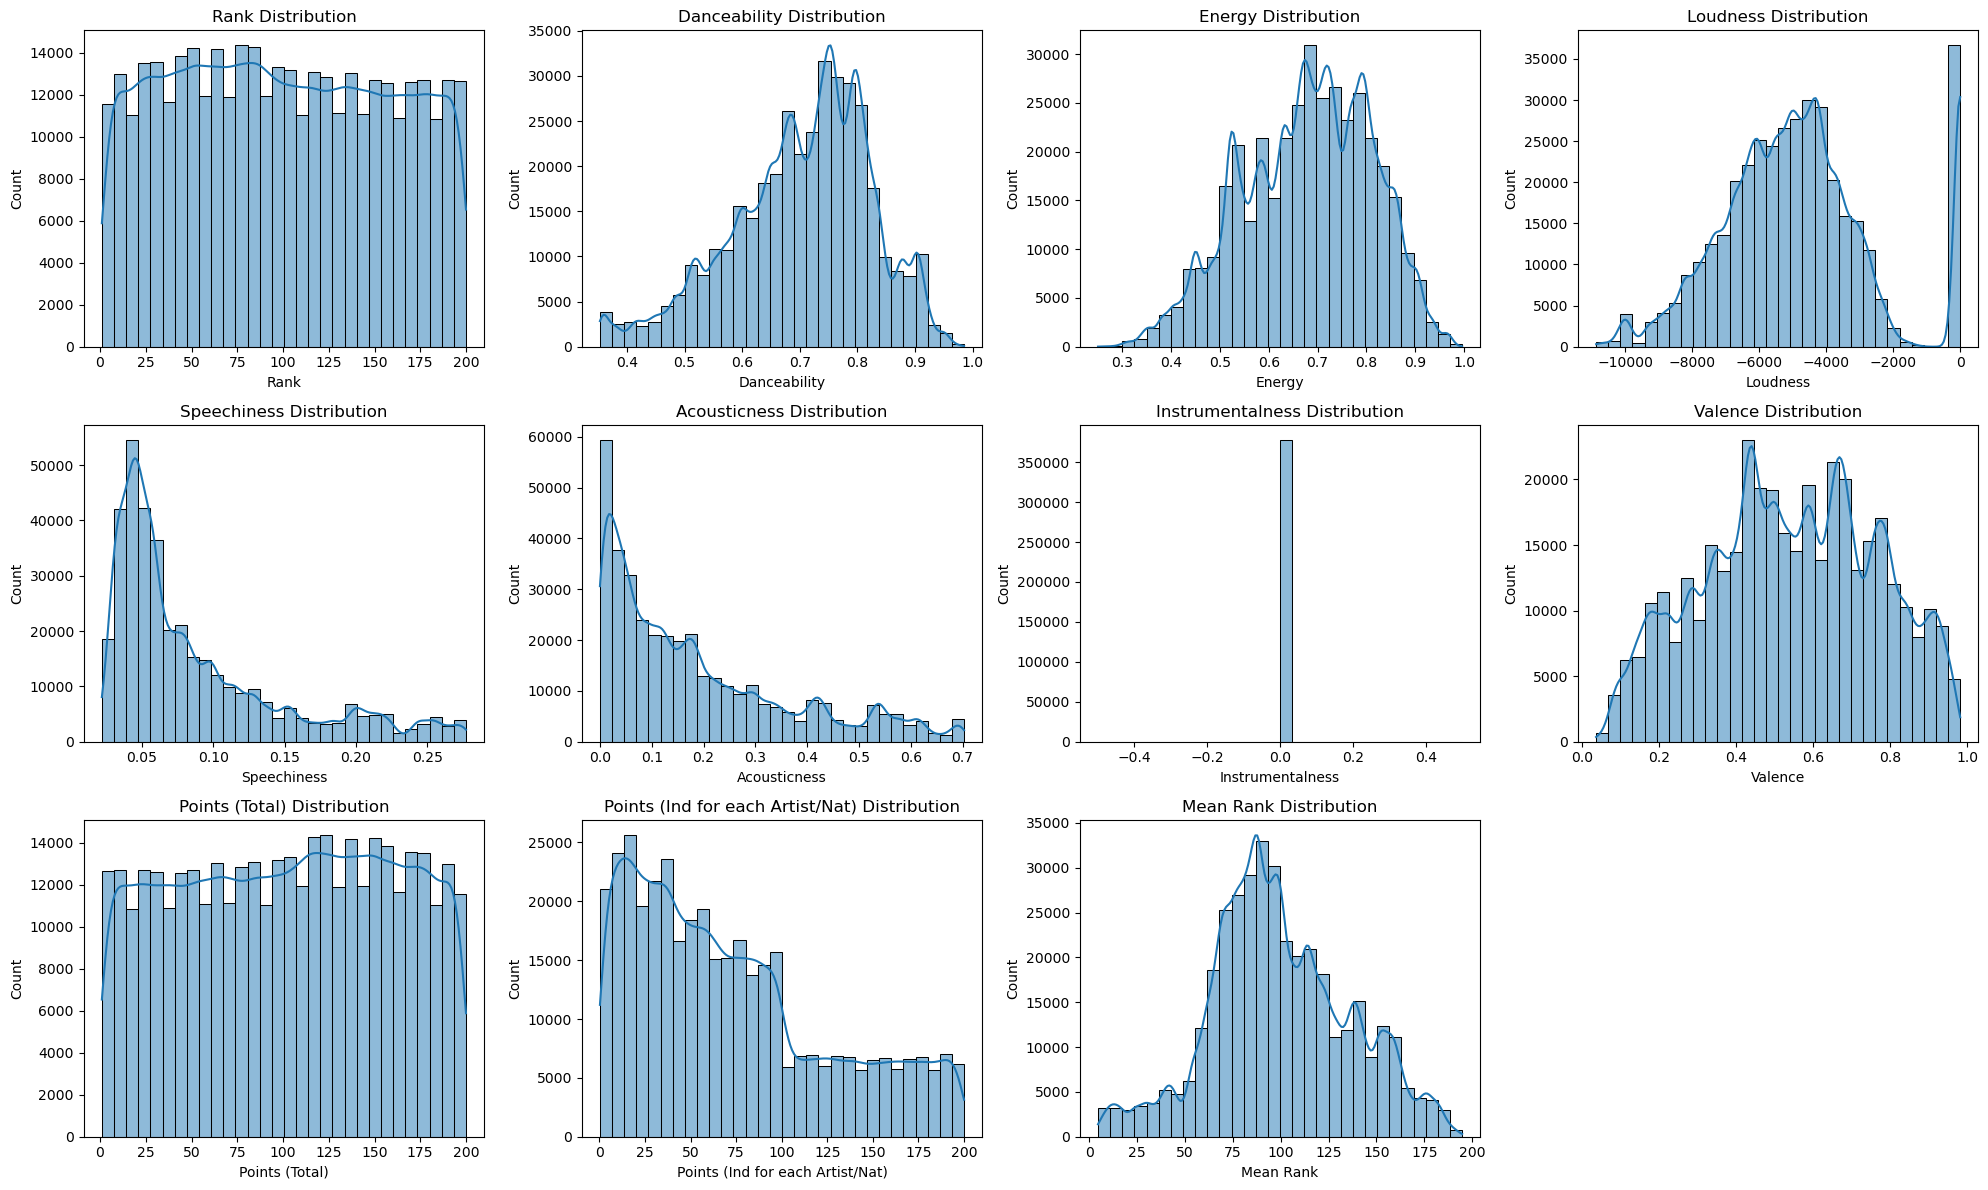

In [34]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_rm_outliers[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

In [35]:
features_to_log_transform = ['Loudness', 'Speechiness', 'Acousticness']
df_transformed = df_rm_outliers.copy()
df_transformed[features_to_log_transform] = df_transformed[features_to_log_transform].apply(lambda x: np.log1p(x - x.min() + 1))

In [36]:
df_rm_outliers.head()


,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Points (Ind for each Artist/Nat),id,Song URL,Genre,Parent Genre,Mean Rank,Year,Month,Month_Quarter,Is_Instrumental
5,4,Cupid - Twin Ver.,FIFTY FIFTY,2023-05-29,0.783,0.592,-8332.0,0.033,0.435,0.0,...,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,k-pop-girl-group,pop,7.474576,2023,5,2,0
12,10,TQG,"KAROL G, Shakira",2023-05-29,0.720,0.630,-3547.0,0.277,0.673,0.0,...,95.5,0DWdj2oZMBFSzRsi2Cvfzf,https://open.spotify.com/track/0DWdj2oZMBFSzRs...,reggaeton,latin,5.431579,2023,5,2,0
13,10,TQG,"KAROL G, Shakira",2023-05-29,0.720,0.630,-3547.0,0.277,0.673,0.0,...,95.5,0DWdj2oZMBFSzRsi2Cvfzf,https://open.spotify.com/track/0DWdj2oZMBFSzRs...,reggaeton,latin,5.431579,2023,5,2,0
16,12,TQM,Fuerza Regida,2023-05-29,0.786,0.853,-4955.0,0.059,0.273,0.0,...,189.0,368eeEO3Y2uZUQ6S5oIjcu,https://open.spotify.com/track/368eeEO3Y2uZUQ6...,corrido,latin,23.090909,2023,5,2,0
17,13,Anti-Hero,Taylor Swift,2023-05-29,0.637,0.643,-6571.0,0.052,0.130,0.0,...,188.0,0V3wPSX9ygBnCm8psDIegu,https://open.spotify.com/track/0V3wPSX9ygBnCm8...,pop,pop,13.470588,2023,5,2,0


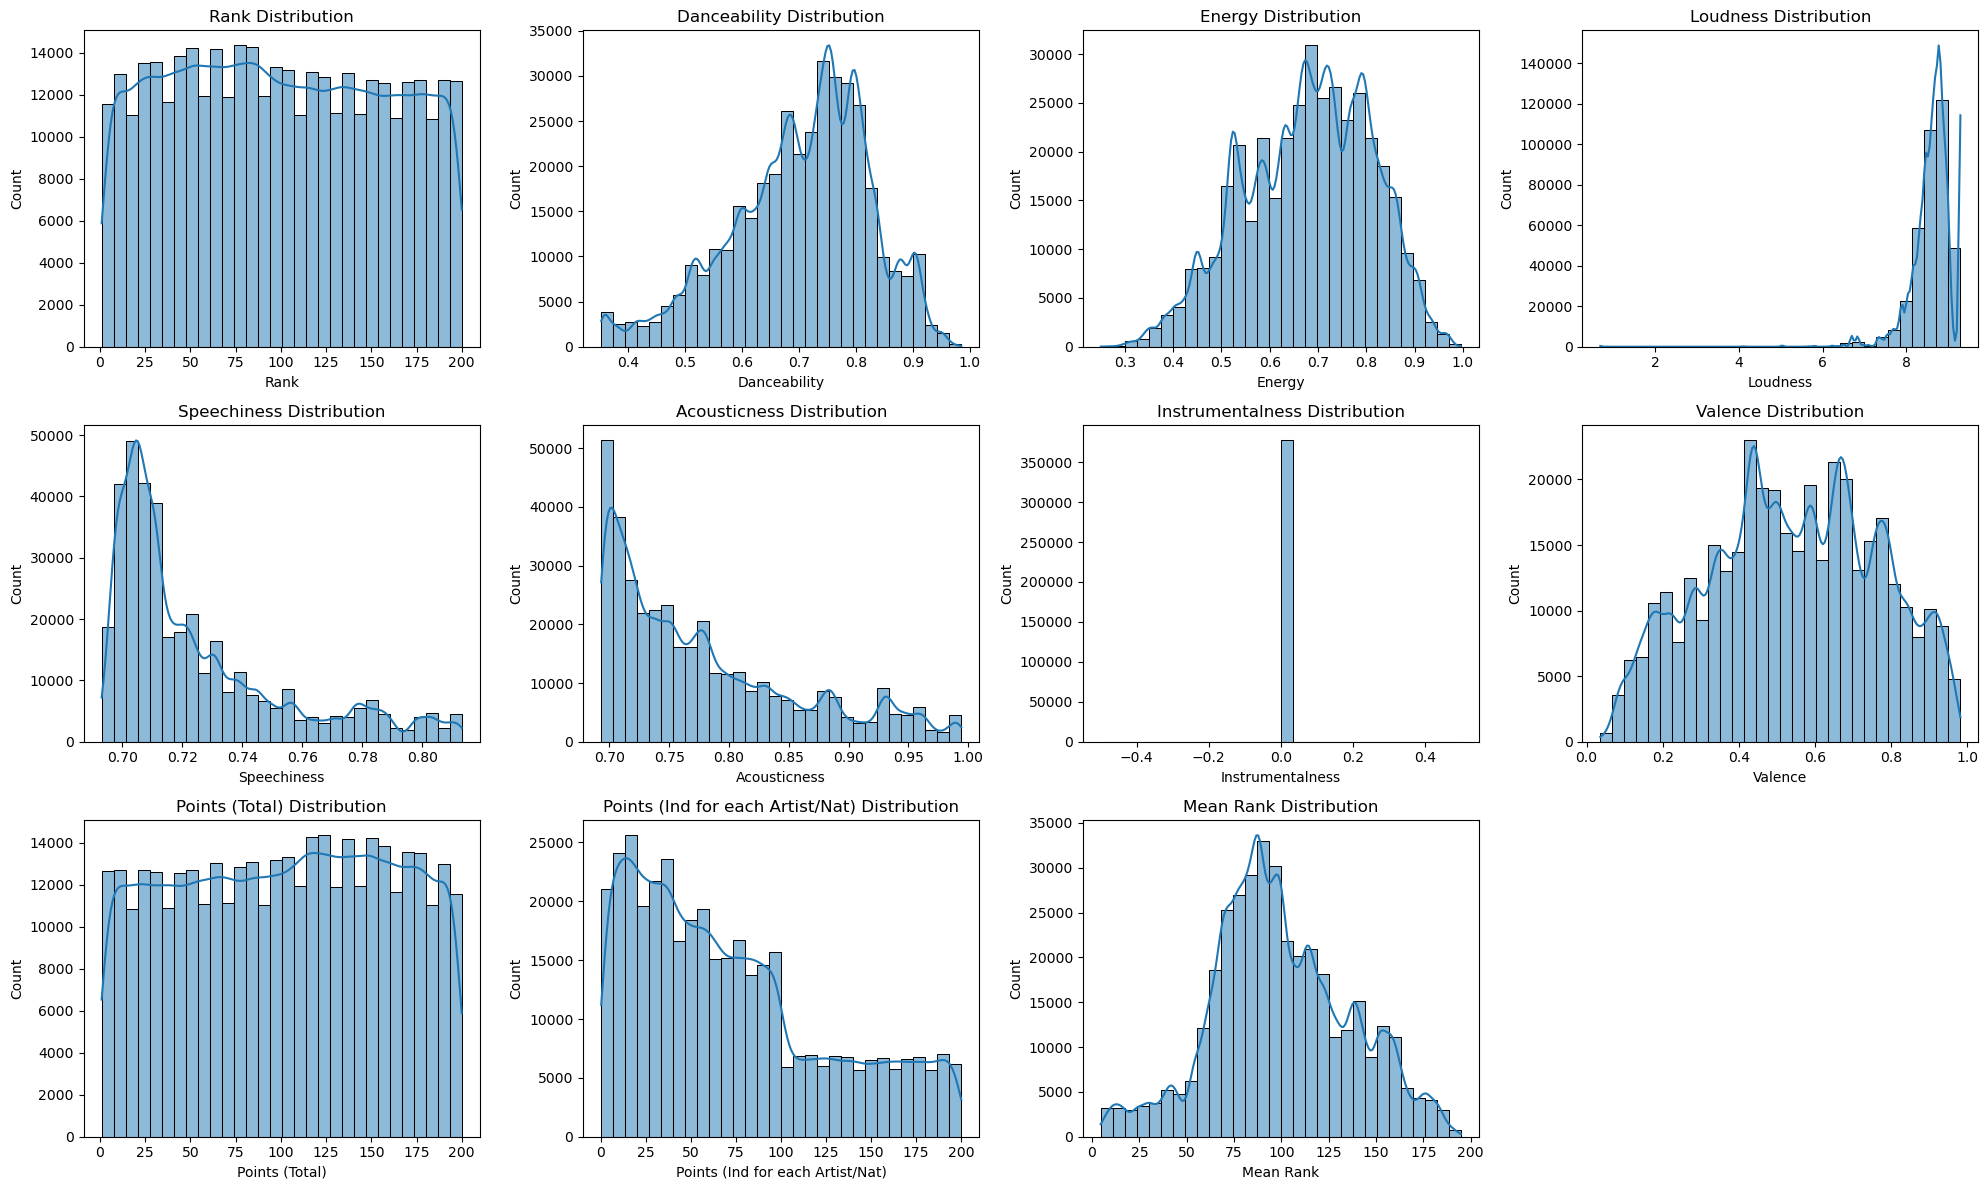

In [37]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_transformed[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

In [38]:
features_to_standardize = ['Rank', 'Mean Rank', 'Danceability', 'Energy', 'Valence', 'Points (Total)', 'Points (Ind for each Artist/Nat)', 'Loudness']
scaler = StandardScaler()
df_transformed[features_to_standardize] = scaler.fit_transform(df_transformed[features_to_standardize])

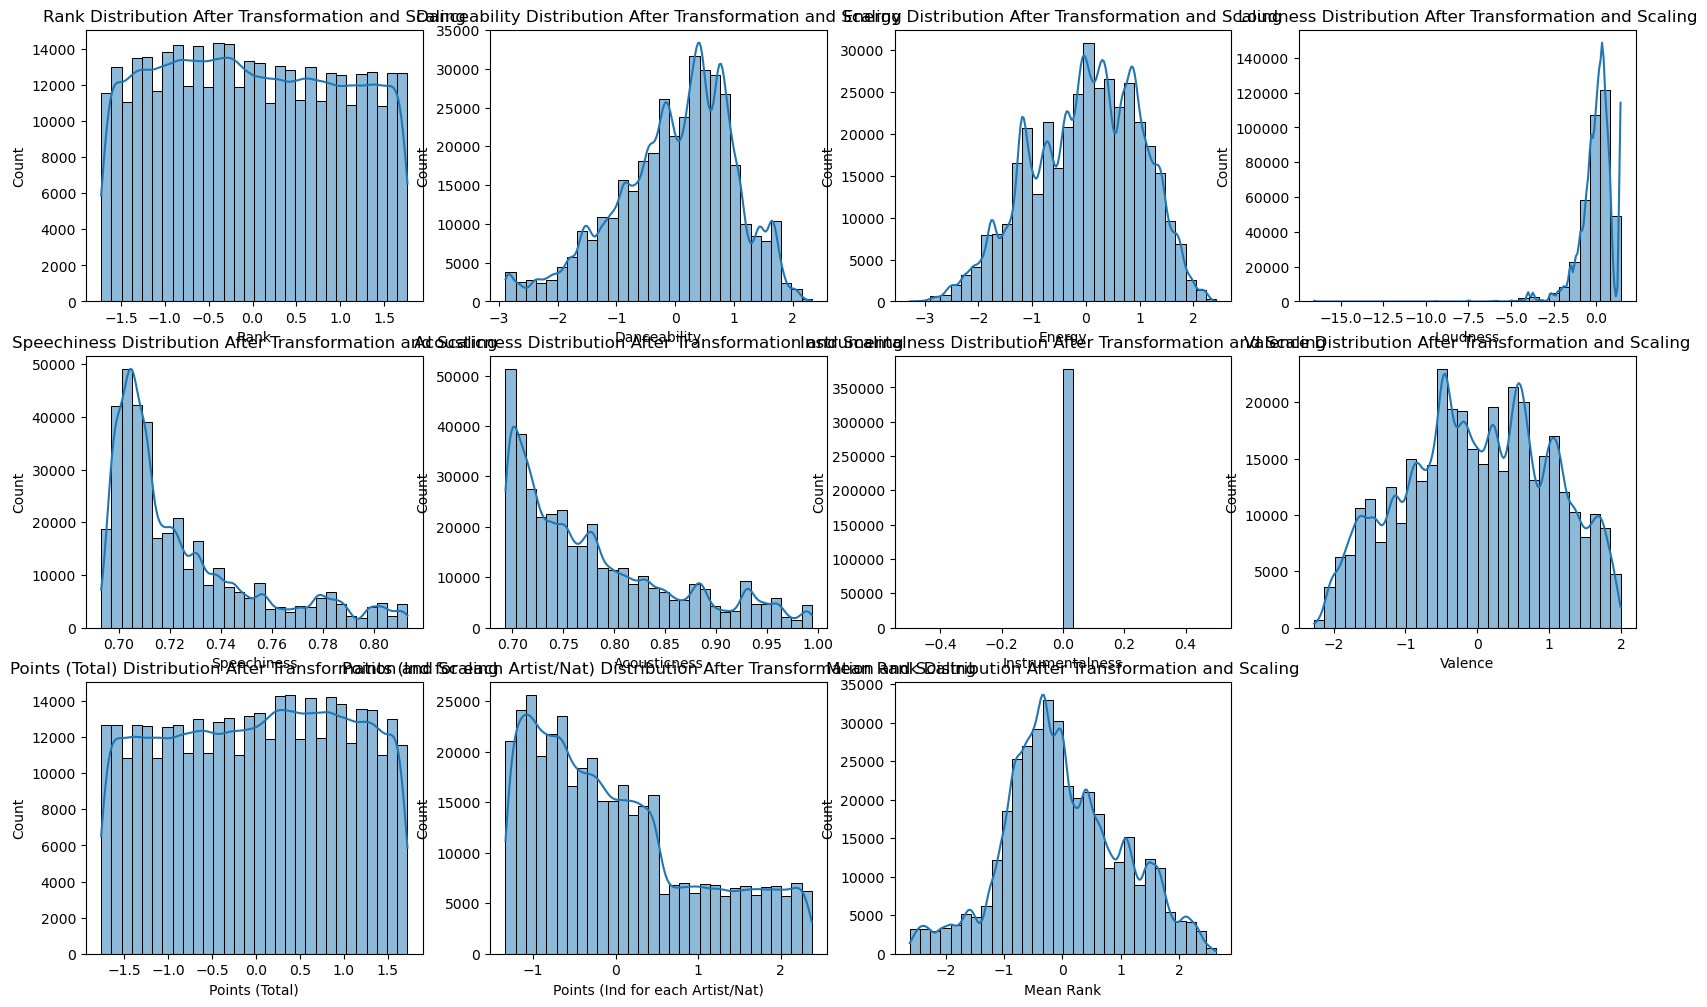

In [39]:
plt.figure(figsize=(20, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_transformed[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution After Transformation and Scaling')
    plt.xlabel(feature)
    plt.ylabel('Count')

As we can observe column for Instrumentalness is too close to 1 so we are going to use Is_Instrumental instead.

In [40]:
df_transformed.drop(columns=["Instrumentalness"], inplace=True)


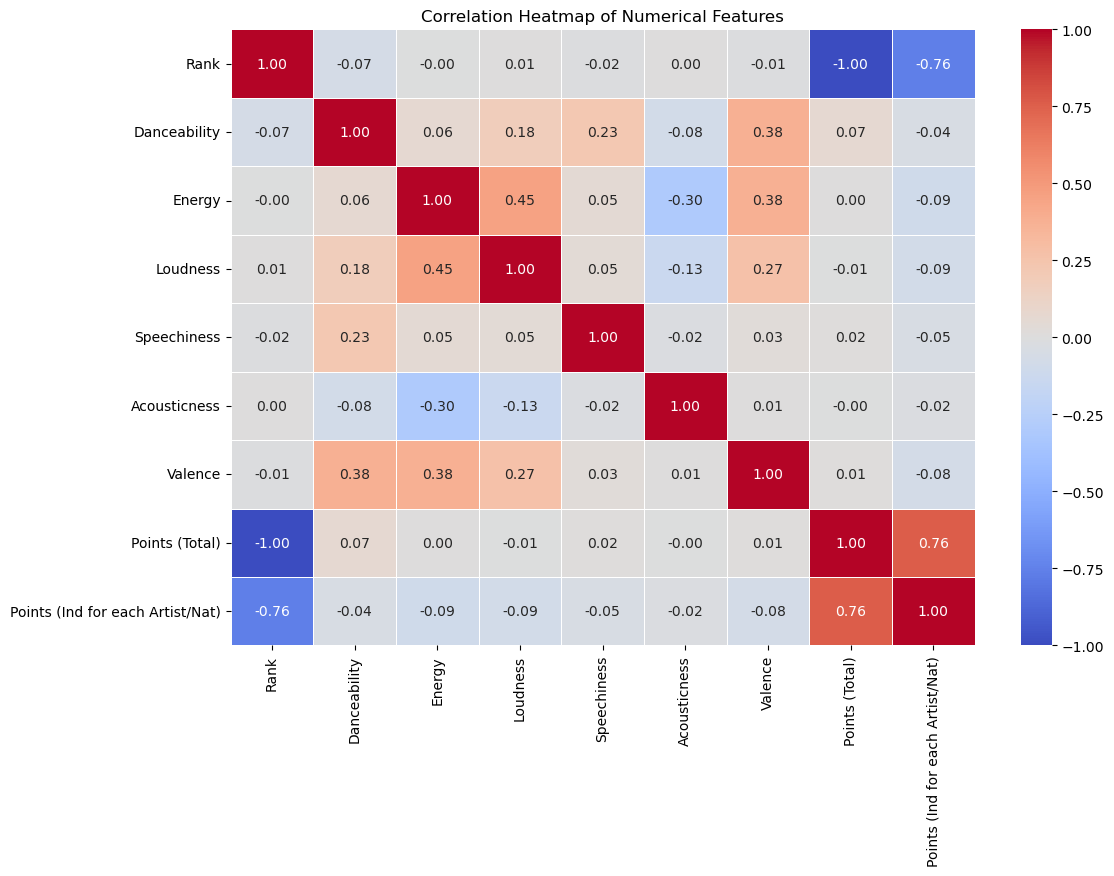

In [ ]:
numerical_features = ['Rank', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence', 'Points (Total)', 'Points (Ind for each Artist/Nat)']

correlation_matrix = df_transformed[numerical_features].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [42]:
'''
sns.pairplot(df_transformed[numerical_features], diag_kind="kde", plot_kws={'alpha': 0.5})
plt.show()
'''

'\nsns.pairplot(df_transformed[numerical_features], diag_kind="kde", plot_kws={\'alpha\': 0.5})\nplt.show()\n'

In [ ]:
# Correlation threshold
threshold = 0.7

# Feature pairs with correlation higher than the threshold
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


print(correlated_features)
df_transformed = df_transformed.drop(columns=correlated_features)
numerical_features = [feature for feature in numerical_features if feature not in list(correlated_features)]
print(numerical_features)


{'Points (Total)', 'Points (Ind for each Artist/Nat)'}
['Rank', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence']


### Visualization and dim. redcution

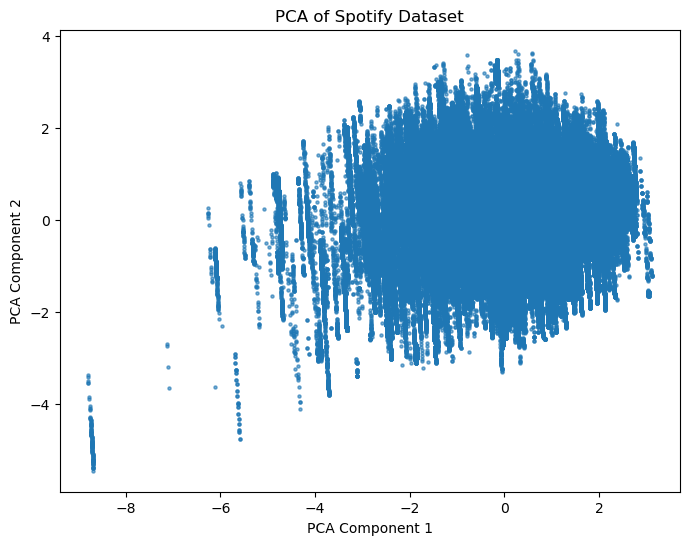

In [ ]:
# PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
pca_components = pca.fit_transform(df_transformed[numerical_features])

# Plotting components
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.6, s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Spotify Dataset')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

scaled_features = df_transformed[numerical_features]
labels = df_transformed['Parent Genre'] 

pca = PCA(n_components=7)
pca_results = pca.fit_transform(scaled_features)

# Eigenvalues
variance = pca.explained_variance_

# Proportion of variance
proportion_variance = pca.explained_variance_ratio_

print("Variance of each component:", variance)
print("Proportion of total variance:", proportion_variance)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(scaled_features)

# Marker size
ss = 30

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(30, 8))
palette = 'colorblind'

# Plot PCA
sns.scatterplot(ax=axes[0], x=pca_results[:, 0], y=pca_results[:, 1], hue=labels,
                palette=palette, s=ss, alpha=0.6, edgecolor='k', linewidth=1)
axes[0].set_title('PCA Result', fontsize=20)

# Plot t-SNE
sns.scatterplot(ax=axes[1], x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels,
                palette=palette, s=ss, alpha=0.6, edgecolor='k', linewidth=1)
axes[1].set_title('t-SNE Result', fontsize=20)

# Plot UMAP
sns.scatterplot(ax=axes[2], x=umap_result[:, 0], y=umap_result[:, 1], hue=labels,
                palette=palette, s=ss, alpha=0.6, edgecolor='k', linewidth=1)
axes[2].set_title('UMAP Result', fontsize=20)


for ax in axes:
    ax.set_xlabel('Component 1', fontsize=14)
    ax.set_ylabel('Component 2', fontsize=14)
    ax.legend(title='Genre', title_fontsize='13', fontsize='12', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()

plt.savefig('Dimensionality_Reduction_Comparison.png', dpi=300)
plt.show()

ModuleNotFoundError: No module named 'umap'

## Test preprocess

In [47]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = ["Title", "Artists", "Date", "# of Artist", "Artist (Ind.)", "# of Nationality", "Nationality", "Continent"]

for feature in categorical_features:
    df_test[feature] = df_test[feature].apply(clean_text)

In [48]:
df_rm_outliers_test = remove_outliers_iqr(df_test, numerical_features)
print(df_rm_outliers_test.shape)

(94837, 23)


In [ ]:
df_rm_outliers_test['Date'] = pd.to_datetime(df_rm_outliers_test['Date'], dayfirst=True, errors='coerce')
df_rm_outliers_test['Year'] = df_rm_outliers_test['Date'].dt.year
df_rm_outliers_test['Month'] = df_rm_outliers_test['Date'].dt.month

df_rm_outliers_test['Month_Quarter'] = df_rm_outliers_test['Date'].dt.day.apply(lambda x: 1 if x <= 15 else 2)
df_rm_outliers_test['Year'] = df_rm_outliers_test['Year'].astype('category')
df_rm_outliers_test['Month'] = df_rm_outliers_test['Month'].astype('category')
df_rm_outliers_test['Month_Quarter'] = df_rm_outliers_test['Month_Quarter'].astype('category')

In [50]:
threshold = 0.5
# Remove the Instrumentalness column since it is distributed too close to zero giving problems to normalize it.
df_rm_outliers_test['Is_Instrumental'] = df_rm_outliers_test['Instrumentalness'].apply(lambda x: 1 if x > threshold else 0)
df_rm_outliers_test['Is_Instrumental'] = df_rm_outliers_test['Is_Instrumental'].astype('category')
categorical_features.append('Is_Instrumental')

In [51]:
df_rm_outliers_test[features_to_standardize] = scaler.fit_transform(df_rm_outliers_test[features_to_standardize])

In [52]:
df_transformed_test = df_rm_outliers_test.copy()
df_transformed_test[features_to_log_transform] = df_transformed_test[features_to_log_transform].apply(lambda x: np.log1p(x - x.min() + 1))

In [53]:
df_transformed_test.drop(columns=["Instrumentalness"], inplace=True)

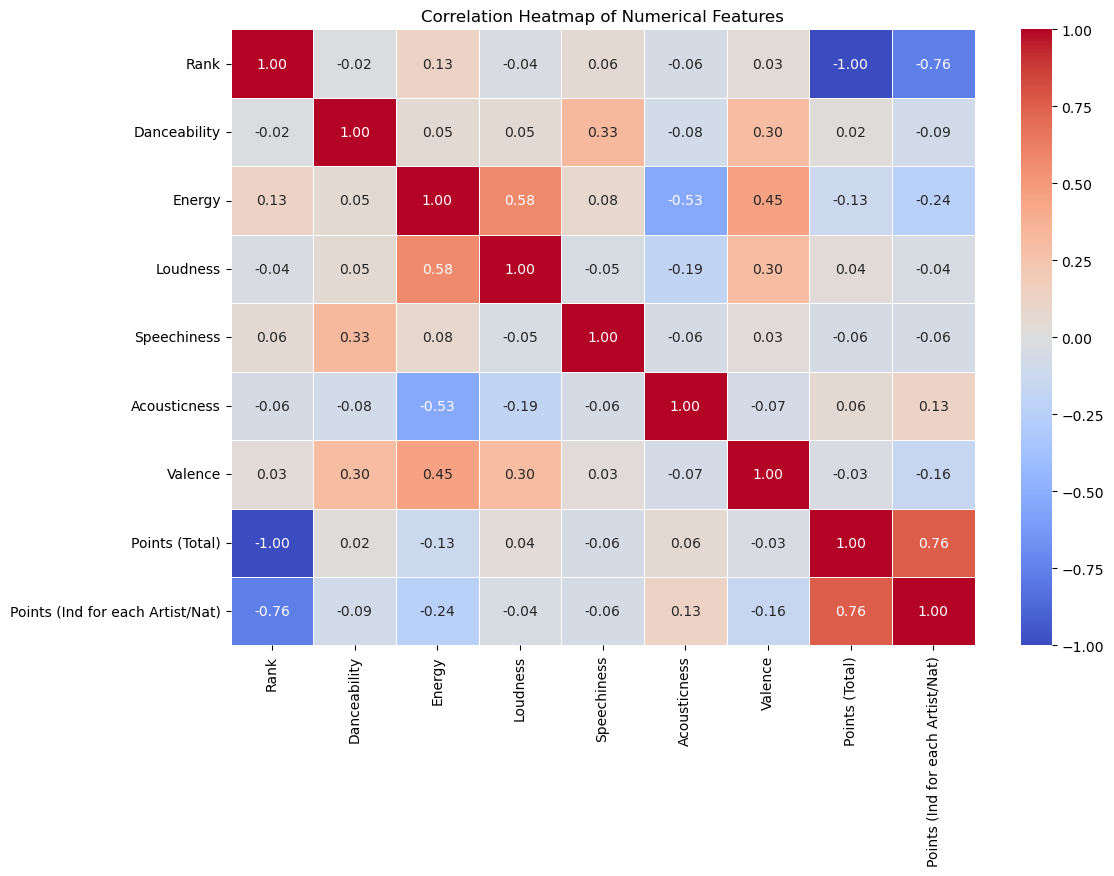

In [ ]:
numerical_features = ['Rank', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence', 'Points (Total)', 'Points (Ind for each Artist/Nat)']
correlation_matrix_test = df_transformed_test[numerical_features].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [55]:
# Use the correlated features that we get from the training set
df_transformed_test = df_transformed_test.drop(columns=correlated_features)
numerical_features = [feature for feature in numerical_features if feature not in list(correlated_features)]
print(numerical_features)


['Rank', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence']


# Task 1

In [56]:
categorical_encoding = 'cat' # Set the categorical encoding variable to le for label encoding hash for hashing and cat for catboost

print(df_transformed_test.isnull().any())

Rank                False
Title               False
Artists             False
Date                False
Danceability        False
Energy              False
Loudness            False
Speechiness         False
Acousticness        False
Valence             False
# of Artist         False
Artist (Ind.)       False
# of Nationality    False
Nationality         False
Continent           False
id                  False
Song URL            False
Genre               False
Parent Genre        False
Mean Rank           False
Year                False
Month               False
Month_Quarter       False
Is_Instrumental     False
dtype: bool


In [ ]:
# We keep only the first occurrence of each 'id'
df_transformed = df_transformed.drop_duplicates(subset='id')
df_transformed_test = df_transformed_test.drop_duplicates(subset='id')

print(df_transformed.shape)
print(df_transformed_test.shape)
print(mean_rank)

(4412, 24)
(1164, 24)
                          id   Mean Rank
0     000xQL6tZNLJzIrtIgxqSl  101.500000
1     003VDDA7J3Xb2ZFlNx7nIZ  138.000000
2     003eoIwxETJujVWmNFMoZy  136.500000
3     003vvx7Niy0yvhvHt4a68B  168.069643
4     00B7TZ0Xawar6NZ00JFomN  109.285714
...                      ...         ...
8679  7zjEyeBsaw9gV0jofJLfOM  174.875000
8680  7zl7kehxesNEo2pYkKXTSe  128.500000
8681  7znO2T2deQ7nZUbyxEAMDB  140.000000
8682  7zvfDihYiJ8RQ1nRcpKBF5   85.375000
8683  7zxRMhXxJMQCeDDg0rKAVo  183.642857

[8684 rows x 2 columns]


In [58]:
print(df_transformed.columns)
print(df_transformed_test.columns)
df_genre = df_transformed.drop(columns = ['Rank','id', 'Title', 'Date', '# of Artist', 'Artist (Ind.)','# of Nationality','Continent',
                               'Song URL', 'Year', 'Month', 'Month_Quarter', 'Genre'])
df_genre_test = df_transformed_test.drop(columns = ['Rank','id', 'Title', 'Date', '# of Artist', 'Artist (Ind.)','# of Nationality','Continent',
                               'Song URL', 'Year', 'Month', 'Month_Quarter', 'Genre'])
print(df_genre.columns)
print(df_genre_test.columns)

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Valence', '# of Artist',
       'Artist (Ind.)', '# of Nationality', 'Nationality', 'Continent', 'id',
       'Song URL', 'Genre', 'Parent Genre', 'Mean Rank', 'Year', 'Month',
       'Month_Quarter', 'Is_Instrumental'],
      dtype='object')
Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Valence', '# of Artist',
       'Artist (Ind.)', '# of Nationality', 'Nationality', 'Continent', 'id',
       'Song URL', 'Genre', 'Parent Genre', 'Mean Rank', 'Year', 'Month',
       'Month_Quarter', 'Is_Instrumental'],
      dtype='object')
Index(['Artists', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Valence', 'Nationality', 'Parent Genre', 'Mean Rank',
       'Is_Instrumental'],
      dtype='object')
Index(['Artists', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
     

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
if categorical_encoding == 'le':
    le = LabelEncoder()
    df_genre['Nationality'] = le.fit_transform(df_genre.Nationality)
    df_genre['Artists'] = le.fit_transform(df_genre.Artists)
    
    df_genre_test['Nationality'] = le.fit_transform(df_genre_test.Nationality)
    df_genre_test['Artists'] = le.fit_transform(df_genre_test.Artists)
elif categorical_encoding == 'hash':
    df_genre = df_genre.reset_index(drop=True)
    df_genre_test = df_genre_test.reset_index(drop=True)
    df_genre['Nationality_list'] = df_genre['Nationality'].apply(lambda x: [x])
    df_genre['Artist_list'] = df_genre['Artists'].apply(lambda x: [x])
    
    df_genre_test['Nationality_list'] = df_genre_test['Nationality'].apply(lambda x: [x])
    df_genre_test['Artist_list'] = df_genre_test['Artists'].apply(lambda x: [x])
    
    hasher_nation = FeatureHasher(n_features=40, input_type='string')
    hasher_artist = FeatureHasher(n_features=100, input_type='string')
    
    # Transforming the features using the hashers
    hashed_nationality = hasher_nation.transform(df_genre['Nationality_list'])
    hashed_artists = hasher_artist.transform(df_genre['Artist_list'])
    
    hashed_nationality_test = hasher_nation.transform(df_genre_test['Nationality_list'])
    hashed_artists_test = hasher_artist.transform(df_genre_test['Artist_list'])
    
    print(hashed_nationality.shape, df_genre.shape)
    # Convert hashed features to a DataFrame and concatenate with the original DataFrame
    
    hashed_nationality_df = pd.DataFrame(hashed_nationality.toarray(), columns=[f'nationality_{i}' for i in range(40)])
    hashed_artists_df = pd.DataFrame(hashed_artists.toarray(), columns=[f'artist_{i}' for i in range(100)])
    
    hashed_nationality_df_test = pd.DataFrame(hashed_nationality_test.toarray(), columns=[f'nationality_{i}' for i in range(40)])
    hashed_artists_df_test = pd.DataFrame(hashed_artists_test.toarray(), columns=[f'artist_{i}' for i in range(100)])
    print(hashed_nationality_df)
    df_genre = pd.concat([df_genre, hashed_nationality_df, hashed_artists_df], axis=1)
    df_genre_test = pd.concat([df_genre_test, hashed_nationality_df_test, hashed_artists_df_test], axis=1)
    
    # Drop intermediate 'Nationality_list' column
    df_genre = df_genre.drop(columns=['Nationality_list', 'Artist_list', 'Nationality', 'Artists'])
    df_genre_test = df_genre_test.drop(columns=['Nationality_list', 'Artist_list', 'Nationality', 'Artists'])

In [60]:
df_genre.drop_duplicates(inplace=True)
df_genre_test.drop_duplicates(inplace=True)

print(df_genre['Parent Genre'].unique())
print(df_genre['Parent Genre'].nunique())

print(df_genre_test['Parent Genre'].unique())
print(df_genre_test['Parent Genre'].nunique())
Y_train = df_genre[['Parent Genre']]
X_train = df_genre.drop(columns='Parent Genre')

Y_test = df_genre_test[['Parent Genre']]
X_test = df_genre_test.drop(columns='Parent Genre')

['pop' 'latin' 'Hip Hop' 'R&B' 'country' 'Electronic' 'rock'
 'World/Traditional' 'Folk/Acoustic' 'metal' 'easy listening' 'classical'
 'jazz']
13
['pop' 'latin' 'Hip Hop' 'Electronic' 'R&B' 'rock' 'country' 'metal'
 'easy listening' 'World/Traditional' 'Folk/Acoustic']
11


In [61]:
print(X_train.shape)
print(X_test.shape)

(4412, 10)
(1164, 10)


In [62]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [ ]:
Y_train = Y_train.values.ravel()  # Convert to numpy array and ensure it's 1D
Y_test = Y_test.values.ravel()    # Convert to numpy array and ensure it's 1D

In [ ]:
if categorical_encoding == 'le' or categorical_encoding == 'hash':
    ## RANDOM FOREST
    # Define stratified K-Fold cross-validation
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    
    # Model
    model = RandomForestClassifier(random_state=42)
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=kfold,
        scoring='f1_weighted',  # f1_weighted to handle class imbalance
        verbose=1,
        n_jobs=-1               # Use all available processors
    )
    
   
    grid_search.fit(X_train, Y_train)
    
    # Retrieve the best model
    best_rf_model = grid_search.best_estimator_
    
    # best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best F1 Weighted Score from GridSearchCV:", grid_search.best_score_)
    
 
    Y_pred = best_rf_model.predict(X_test)
    
   
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    f1_weighted = f1_score(Y_test, Y_pred, average='weighted')
    print(f"Weighted F1 Score: {f1_weighted:.4f}")
    

    # Multiple statistics for results
    print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
    
    # Confusion Matrix
    Y_test_flat = Y_test.to_numpy().ravel()  
    Y_pred_flat = Y_pred.ravel()  #
    # Concatenate and find unique class labels
    class_labels = np.unique(np.concatenate([Y_test_flat, Y_pred_flat]))
    

    confusion_matrix_result = confusion_matrix(Y_test_flat, Y_pred_flat)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=class_labels)
    cm_display.plot()

    plt.xticks(rotation=90)
    if categorical_encoding == 'le':
        plt.savefig("confusion_matrix_random_forest_le_new.pdf", dpi=300, bbox_inches='tight')  
    elif categorical_encoding == 'hash':
        plt.savefig("confusion_matrix_random_forest_hash_new.pdf", dpi=300, bbox_inches='tight') 
    
    plt.show()

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


ValueError: 
All the 1080 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'FIFTY FIFTY'

--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'KAROL G, Shakira'


Elapsed time to compute the importances: 0.032 seconds


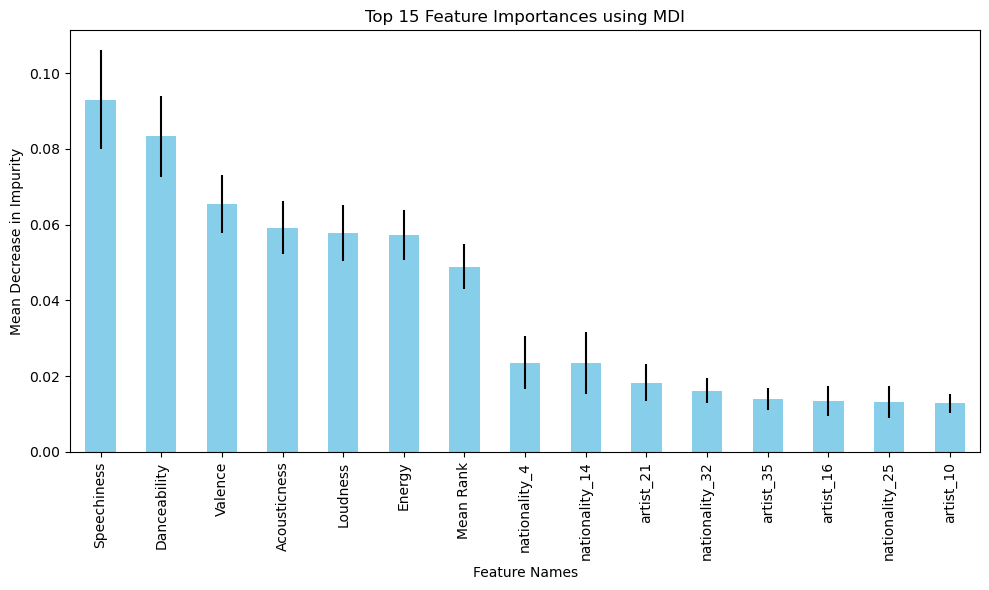

In [ ]:
if categorical_encoding == 'le' or categorical_encoding == 'hash':
    import time
    
    # Timer to measure computation time
    start_time = time.time()
    
    importances = best_rf_model.feature_importances_  
    std = np.std([tree.feature_importances_ for tree in best_rf_model.estimators_], axis=0)
    elapsed_time = time.time() - start_time
    
    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
    
    # Series for feature importances with feature names
    forest_importances = pd.Series(importances, index=X_train.columns)
    
    # top 15 features by sorting
    top_15_features = forest_importances.nlargest(15)
    top_15_indices = [X_train.columns.get_loc(feature) for feature in top_15_features.index]
    
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
    top_15_features.plot.bar(yerr=std[top_15_indices], ax=ax, color="skyblue")
    ax.set_title("Top 15 Feature Importances using MDI")
    ax.set_ylabel("Mean Decrease in Impurity")
    ax.set_xlabel("Feature Names")
    fig.tight_layout()
    if categorical_encoding == 'le':
        plt.savefig("feature_importance_top15_le_new.pdf", dpi=300, bbox_inches='tight')  
    elif categorical_encoding == 'hash':
        plt.savefig("feature_importance_top15_hash_new.pdf", dpi=300, bbox_inches='tight')  
    plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Hyperparameters: {'C': 10, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
Best Cross-Validation Accuracy: 0.6790931646439501


C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Test Set Accuracy: 0.6898625429553265
F1 Score: 0.6826052576571877

Classification Report:
                    precision    recall  f1-score   support

       Electronic       0.37      0.43      0.40        51
    Folk/Acoustic       1.00      0.67      0.80         3
          Hip Hop       0.75      0.74      0.74       374
              R&B       0.69      0.28      0.40        39
World/Traditional       0.00      0.00      0.00         3
          country       0.89      0.83      0.86        47
   easy listening       1.00      0.20      0.33         5
            latin       0.55      0.46      0.50        85
            metal       0.75      0.60      0.67        15
              pop       0.68      0.78      0.73       499
             rock       0.62      0.35      0.45        43

         accuracy                           0.69      1164
        macro avg       0.66      0.48      0.53      1164
     weighted avg       0.69      0.69      0.68      1164



C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

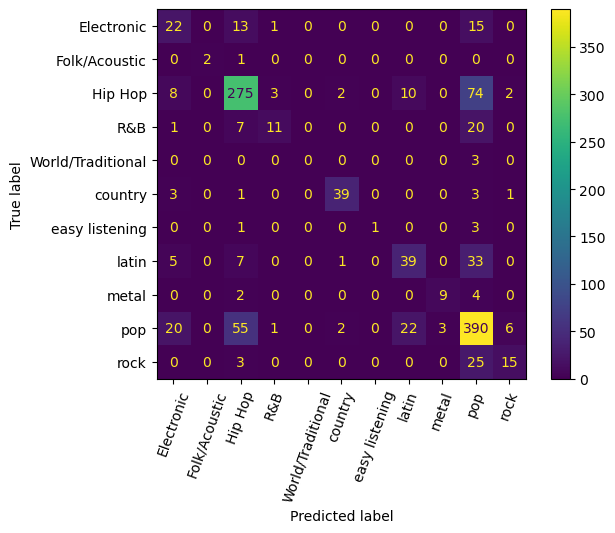

In [ ]:
if categorical_encoding == 'le' or categorical_encoding == 'hash':
    from sklearn.model_selection import GridSearchCV, StratifiedKFold
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
    
    Y_train = np.ravel(Y_train)
    Y_test = np.ravel(Y_test)
    
    model = LogisticRegression()
    
    param_grid = {
        'penalty': ['l2'],                    
        'C': [0.01, 0.1, 1, 10, 100],               
        'solver': ['newton-cg', 'sag'],           
        'max_iter': [100, 500],           
        'multi_class' : ['multinomial'],
    }
    

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=kfold,
        scoring='f1_weighted',                      
        verbose=1,
        n_jobs=-1                                 
    )
    
    grid_search.fit(X_train, Y_train)
    
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Cross-Validation Accuracy:", grid_search.best_score_)
    
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, Y_train)

    Y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    f1_scores = f1_score(Y_test, Y_pred, average='weighted')
    
    print("\nTest Set Accuracy:", accuracy)
    print(f"F1 Score: {f1_scores}")
    print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
    
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    class_labels = np.unique(Y_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
    cm_display.plot(xticks_rotation=70)
    
    plt.savefig("lr_confusion_matrix.pdf", format="pdf", bbox_inches="tight")
    plt.show()


Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Weighted Score from GridSearchCV: 0.7463136123176312
Gradient Boosting Accuracy: 0.7328178694158075
F1 Macro Score: 0.4320

Classification Report for Gradient Boosting:
                    precision    recall  f1-score   support

       Electronic       0.37      0.59      0.45        51
    Folk/Acoustic       0.22      0.67      0.33         3
          Hip Hop       0.86      0.73      0.79       374
              R&B       0.86      0.49      0.62        39
World/Traditional       0.00      0.00      0.00         3
        classical       0.00      0.00      0.00         0
          country       0.79      0.70      0.74        47
   easy listening       0.00      0.00      0.00         5
             jazz       0.00      0.00      0.00         0
            latin       0.90      0.32      0.47        85
            metal       0.

C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (11).

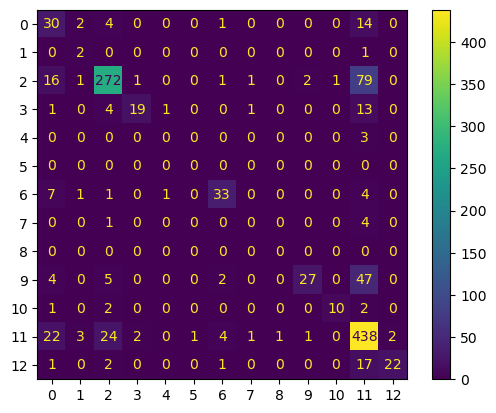

In [ ]:
if categorical_encoding == 'le' or categorical_encoding == 'hash':
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.model_selection import StratifiedKFold, GridSearchCV
    from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, ],
        'max_depth': [3, 4,],
        'min_samples_split': [2, 5, ],
        'min_samples_leaf': [1, 2,]
    }
    
    gb_model = GradientBoostingClassifier(random_state=42)
    
    grid_search_gb = GridSearchCV(
        estimator=gb_model,
        param_grid=param_grid,
        cv=kfold,
        scoring='f1_weighted',  
        verbose=1,
        n_jobs=-1               
    )
    
    grid_search_gb.fit(X_train, Y_train)

    best_gb_model = grid_search_gb.best_estimator_
    
    print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
    print("Best F1 Weighted Score from GridSearchCV:", grid_search_gb.best_score_)
    
    Y_pred_gb = best_gb_model.predict(X_test)
    
    # Metrics
    print("Gradient Boosting Accuracy:", accuracy_score(Y_test, Y_pred_gb))
    
    f1_macro = f1_score(Y_test, Y_pred_gb, average='macro')
    print(f"F1 Macro Score: {f1_macro:.4f}")
    
    print("\nClassification Report for Gradient Boosting:\n", classification_report(Y_test, Y_pred_gb))

    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_gb)
    class_labels = np.unique(Y_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)
    cm_display.plot()
    if categorical_encoding == 'le':
        plt.savefig("gradientboost_confusion_matrix_le_new.pdf", dpi=300, bbox_inches='tight') 
    elif categorical_encoding == 'hash':
        plt.savefig("gradientboost_confusion_matrix_hash_new.pdf", dpi=300, bbox_inches='tight') 
    plt.show()


In [65]:
### CATBOOST
if categorical_encoding == 'cat':
    from catboost import CatBoostClassifier
    
    # Specify the categorical features
    categorical_indices = [0, 7, 9]  # Replace with indices of the categorical columns
    
    # Initialize CatBoostClassifier
    cat_model = CatBoostClassifier(
        random_state=42,
        verbose=0,
        cat_features=categorical_indices
    )
    
    # Define parameter grid
    param_grid = {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [4, 6, 8]
    }
    
    # Set up StratifiedKFold
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Use GridSearchCV for parameter tuning
    grid_search_cat = GridSearchCV(
        estimator=cat_model,
        param_grid=param_grid,
        cv=kfold,
        scoring='f1_weighted',  # Adjust scoring metric if needed
        verbose=1,
        n_jobs=-1
    )
    
    # Fit the model
    grid_search_cat.fit(X_train, Y_train)
    
    # Retrieve best model and parameters
    best_cat_model = grid_search_cat.best_estimator_
    print("Best Parameters for CatBoost:", grid_search_cat.best_params_)
    print("Best F1 Weighted Score:", grid_search_cat.best_score_)
    
    # Evaluate on the test set
    Y_pred = best_cat_model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    f1_macro = f1_score(Y_test, Y_pred, average='macro')
    print(f"F1 Macro Score: {f1_macro:.4f}")
    
    print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\user\anaconda3_2\envs\aml_catboost\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

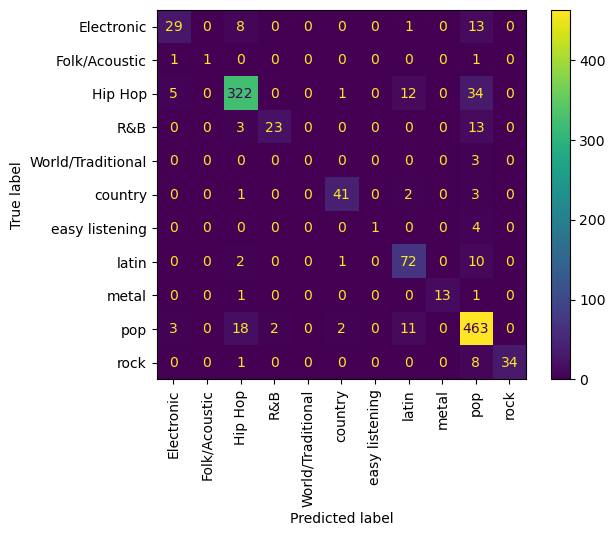

In [ ]:
if categorical_encoding == 'cat':
    # Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    class_labels = np.unique(Y_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)
    cm_display.plot()
    # Rotate x-axis labels
    plt.xticks(rotation=90)
    plt.savefig("CatBoost_confusion_matrix_new.pdf", dpi=300, bbox_inches='tight') 
    
    plt.show()

           Feature  Importance
7      Nationality   34.760267
0          Artists   25.635306
1     Danceability    7.429738
4      Speechiness    6.161662
5     Acousticness    6.123983
6          Valence    5.909798
3         Loudness    4.873066
2           Energy    4.811099
8        Mean Rank    4.295081
9  Is_Instrumental    0.000000


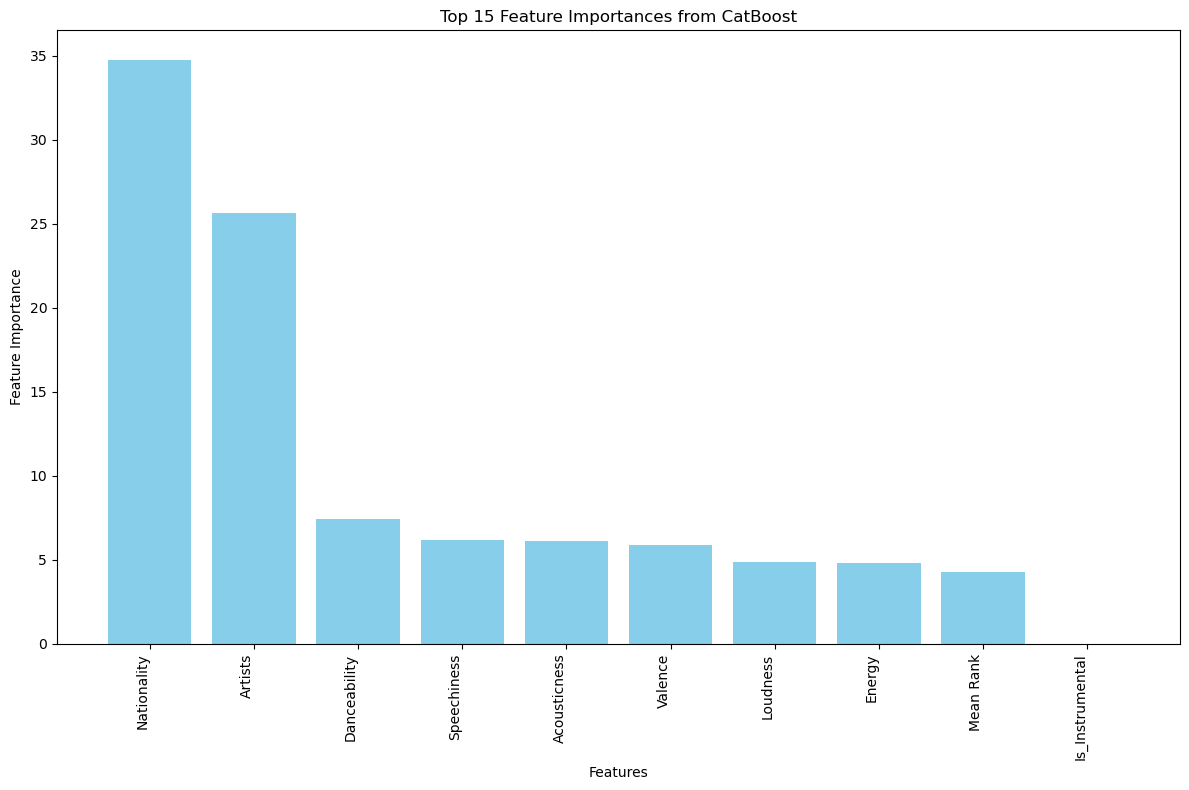

In [ ]:
if categorical_encoding == 'cat':
    # Retrieve feature importances from the best CatBoost model
    feature_importances = best_cat_model.get_feature_importance()
    
    # DataFrame for better readability
    feature_importances_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    # Top features
    print(feature_importances_df.head(15))
    
    plt.figure(figsize=(12, 8))
    plt.bar(feature_importances_df['Feature'].head(15), feature_importances_df['Importance'].head(15), color="skyblue")
    plt.ylabel("Feature Importance")
    plt.xlabel("Features")
    plt.title("Top 15 Feature Importances from CatBoost")
    plt.xticks(rotation=90, ha="right") 
    plt.tight_layout()
    plt.savefig("catboost_importance_new.pdf", dpi=300, bbox_inches='tight') 
    plt.show()


# Task 2

In [ ]:
df_transformed['Year'] = pd.to_numeric(df_transformed['Year'], errors='coerce')
df_transformed_test['Year'] = pd.to_numeric(df_transformed['Year'], errors='coerce')

In [ ]:
artist_data = df_transformed.groupby('Artist (Ind.)').agg({
    'Danceability': ['mean', 'median'],
    'Energy': ['mean', 'median'],
    'Loudness': ['mean', 'median'],
    'Speechiness': ['mean'],
    'Acousticness': ['mean'],
    'Valence': ['mean'],
    'Genre': pd.Series.nunique,  # Count of unique genres
    'Parent Genre': pd.Series.nunique,  # Count of unique parent genres
    'Rank': 'mean',
    'Year': ['max', lambda x: x.max() - x.min()]  # Most recent year and range
})

artist_data.columns = ['_'.join(col).strip() for col in artist_data.columns]


artist_data.rename(columns={
    'Rank_mean': 'mean_rank',
    'Year_max': 'most_recent_year',
    'Year_<lambda_0>': 'active_years_range',
    'Genre_nunique': 'unique_genres',
    'Parent Genre_nunique': 'unique_parent_genres'
}, inplace=True)

artist_data['target_mean_rank'] = artist_data['mean_rank']
artist_data['popularity_class'] = pd.qcut(artist_data['mean_rank'], q=3, labels=['High', 'Medium', 'Low'])


In [ ]:
artist_data_test = df_transformed_test.groupby('Artist (Ind.)').agg({
    'Danceability': ['mean'],
    'Energy': ['mean'],
    'Loudness': ['mean'],
    'Speechiness': ['mean'],
    'Acousticness': ['mean'],
    'Valence': ['mean'],
    'Genre': pd.Series.nunique,  # Count of unique genres
    'Parent Genre': pd.Series.nunique,  # Count of unique parent genres
    'Rank': 'mean',
    'Year': ['max', lambda x: x.max() - x.min()]  # Most recent year and range
})

artist_data_test.columns = ['_'.join(col).strip() for col in artist_data_test.columns]


artist_data_test.rename(columns={
    'Rank_mean': 'mean_rank',
    'Year_max': 'most_recent_year',
    'Year_<lambda_0>': 'active_years_range',
    'Genre_nunique': 'unique_genres',
    'Parent Genre_nunique': 'unique_parent_genres'
}, inplace=True)

artist_data_test['target_mean_rank'] = artist_data_test['mean_rank']
artist_data_test['popularity_class'] = pd.qcut(artist_data_test['mean_rank'], q=3, labels=['High', 'Medium', 'Low'])


In [ ]:

X = artist_data.drop(columns=['mean_rank', 'popularity_class', 'target_mean_rank'])
y = artist_data['popularity_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
X_test_final = artist_data_test.drop(columns=['mean_rank', 'popularity_class', 'target_mean_rank'])
y_test_final = artist_data_test['popularity_class']


In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Transforms 'High', 'Medium', 'Low' into 0, 1, 2
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
y_test_encoded_final = label_encoder.transform(y_test_final)

### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

model_svm = SVC(probability=True, random_state=42)

model_svm.fit(X_train, y_train_encoded)

y_pred_svm = model_svm.predict(X_test)

y_pred_labels_svm = label_encoder.inverse_transform(y_pred_svm)

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_labels_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels_svm))


SVM Classification Report:
              precision    recall  f1-score   support

        High       0.57      0.33      0.42        93
         Low       0.41      0.91      0.56        94
      Medium       0.47      0.08      0.13        93

    accuracy                           0.44       280
   macro avg       0.48      0.44      0.37       280
weighted avg       0.48      0.44      0.37       280


Confusion Matrix:
[[31 59  3]
 [ 3 86  5]
 [20 66  7]]


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, y_train_encoded)

y_pred_rf = model_rf.predict(X_test)

# Decode predictions (optional)
y_pred_labels_rf = label_encoder.inverse_transform(y_pred_rf)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_labels_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.51      0.56      0.54        93
         Low       0.54      0.59      0.56        94
      Medium       0.57      0.47      0.52        93

    accuracy                           0.54       280
   macro avg       0.54      0.54      0.54       280
weighted avg       0.54      0.54      0.54       280


Confusion Matrix:
[[52 23 18]
 [24 55 15]
 [25 24 44]]


### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

param_grid = {
    'n_estimators': [50, 100, 150], 
    'learning_rate': [0.01, 0.05, 0.1],  
    'gamma': [0, 0.1, 0.2],  
    'reg_alpha': [0, 0.1, 0.5],  
    'reg_lambda': [1, 2, 3] 
}

model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=3, 
    verbose=2, 
    n_jobs=-1  
)

grid_search.fit(X_train, y_train_encoded)

best_xgb = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

y_pred_xgb = best_xgb.predict(X_test)

y_pred_labels_xgb = label_encoder.inverse_transform(y_pred_xgb)

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_labels_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels_xgb))

Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Python39\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [19:45:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 3}

XGBoost Classification Report:
              precision    recall  f1-score   support

        High       0.48      0.57      0.52        93
         Low       0.51      0.52      0.51        94
      Medium       0.48      0.38      0.42        93

    accuracy                           0.49       280
   macro avg       0.49      0.49      0.49       280
weighted avg       0.49      0.49      0.49       280


Confusion Matrix:
[[53 22 18]
 [25 49 20]
 [32 26 35]]


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Encode labels if not already done
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Compute class weights (optional, for imbalanced data)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights_dict = dict(enumerate(class_weights))

param_grid = {
    'C': [0.1, 1, 10, 100], 
    'penalty': ['l2'],  # Regularization type (only 'l2' supported with multinomial)
    'solver': ['lbfgs', 'saga'], 
    'class_weight': [class_weights_dict, None], 
    'multi_class': ['multinomial']  
}

model_lr = LogisticRegression(random_state=42, max_iter=500)

grid_search = GridSearchCV(
    estimator=model_lr,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5, 
    verbose=2,  
    n_jobs=-1  
)

grid_search.fit(X_train, y_train_encoded)

best_lr = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

y_pred_lr = best_lr.predict(X_test)

y_pred_labels_lr = label_encoder.inverse_transform(y_pred_lr)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_labels_lr))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels_lr))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Best Parameters: {'C': 100, 'class_weight': {0: 1.0, 1: 1.0, 2: 1.0}, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.46      0.48        93
         Low       0.46      0.76      0.57        94
      Medium       0.46      0.19      0.27        93

    accuracy                           0.47       280
   macro avg       0.47      0.47      0.44       280
weighted avg       0.47      0.47      0.44       280


Confusion Matrix:
[[43 38 12]
 [14 71  9]
 [29 46 18]]


c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train_encoded)

y_pred_knn = knn.predict(X_test)

y_pred_labels_knn = label_encoder.inverse_transform(y_pred_knn)

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_labels_knn))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels_knn))


KNN Classification Report:
              precision    recall  f1-score   support

        High       0.42      0.56      0.48        93
         Low       0.46      0.47      0.46        94
      Medium       0.41      0.27      0.32        93

    accuracy                           0.43       280
   macro avg       0.43      0.43      0.42       280
weighted avg       0.43      0.43      0.42       280


Confusion Matrix:
[[52 24 17]
 [31 44 19]
 [40 28 25]]


### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

mlp = MLPClassifier(random_state=42, max_iter=200)

mlp.fit(X_train, y_train_encoded)

y_pred_mlp = mlp.predict(X_test)

y_pred_labels_mlp = label_encoder.inverse_transform(y_pred_mlp)

print("\nMLP Classification Report:")
print(classification_report(y_test, y_pred_labels_mlp))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels_mlp))


MLP Classification Report:
              precision    recall  f1-score   support

        High       0.34      0.99      0.51        93
         Low       0.00      0.00      0.00        94
      Medium       0.40      0.04      0.08        93

    accuracy                           0.34       280
   macro avg       0.25      0.34      0.19       280
weighted avg       0.25      0.34      0.19       280


Confusion Matrix:
[[92  0  1]
 [89  0  5]
 [89  0  4]]


c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### GCP

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

kernel = RBF(length_scale=1.0)

gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

gpc.fit(X_train, y_train_encoded)

y_pred_gpc = gpc.predict(X_test)

y_pred_labels_gpc = label_encoder.inverse_transform(y_pred_gpc)

print("\nGPC Classification Report:")
print(classification_report(y_test, y_pred_labels_gpc))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels_gpc))

c:\Python39\lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(



GPC Classification Report:
              precision    recall  f1-score   support

        High       0.45      0.53      0.49        93
         Low       0.44      0.68      0.54        94
      Medium       0.30      0.09      0.13        93

    accuracy                           0.43       280
   macro avg       0.40      0.43      0.39       280
weighted avg       0.40      0.43      0.39       280


Confusion Matrix:
[[49 34 10]
 [21 64  9]
 [39 46  8]]


## NOTE

The results might not exactly match those described in the report, as new executions have been conducted without setting a seed for random states. Nonetheless, they remain highly consistent, exhibiting only minor variations that do not significantly impact the overall findings.